# Exploring and Visualizing FordGoBike Data
## by (Brent Murphy)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

import requests
import re

from timeit import default_timer as timer

from zipfile import ZipFile
from urllib.request import urlopen   

import glob


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Gather Data

## The process below is how I gathered by data from Amazon AWS

### created a list of files that had the data that I wanted to download
URLS = ["https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv", 
        "https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201901-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201902-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201903-fordgobike-tripdata.csv.zip", 
        "https://s3.amazonaws.com/fordgobike-data/201904-fordgobike-tripdata.csv.zip"
]

start = timer()

for u in URLS:
    print('Copying data from... ' + u)
    
    download_start = timer()
    
    URL = u
    zipName = u.replace('https://s3.amazonaws.com/fordgobike-data/', '')
    save_file = u.replace('https://s3.amazonaws.com/fordgobike-data/', '').replace('.zip', '')

    # open and save the zip file onto computer
    url = urlopen(URL)
    output = open(zipName, 'wb')    # note the flag:  "wb"        
    output.write(url.read())
    output.close()

    # read the zip file as a pandas dataframe
    df = pd.read_csv(zipName)    #zip files       
    
    # save the dataframe as a new .csv file
    print('Saving data to... ' + './fordgobike-data/' + save_file)
    df.to_csv('./fordgobike-data/' + save_file, encoding='utf-8', index=False)

    # if keeping on disk the zip file is not wanted, then:
    print('Removing... ' + zipName)
    os.remove(zipName)   # remove the copy of the zipfile on disk
    
    end = timer()

    print('Elapsed time to copy ' + zipName + ': ' + str(end - download_start)  + ' seconds')
    
end = timer()
print('Operation complete! Elapsed time: ' + str(end - start) + ' seconds')

path = './fordgobike-data/'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

merged_csv_df = pd.concat(li, axis=0, ignore_index=True)

Created 1 dataframe, merged_csv_df, containing all data

merged_csv_df.shape

merged_csv_df.to_csv('./fordgobike-data/fordgobike-data-2017-thru-201904.csv', encoding='utf-8', index=False)

Saved merged_csv_df to 'fordgobike-data-2017-thru-201904.csv'

## Asses

In [2]:
# load the dataset
fordgobike_df = pd.read_csv('./fordgobike-data/fordgobike-data-2017-thru-201904.csv')

C:\Users\bm9874\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fordgobike_df.shape

(3254325, 16)

In [85]:
fordgobike_df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN


In [86]:
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [88]:
# check for duplicates
fordgobike_df.duplicated().sum()

0

In [89]:
# search for NaN values
fordgobike_df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          218166
member_gender              217733
bike_share_for_all_trip    519700
dtype: int64

In [90]:
fordgobike_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1256729,550,2018-06-13 19:19:34.6610,2018-06-13 19:28:45.3950,338.0,13th St at Franklin St,37.803189,-122.270579,196.0,Grand Ave at Perkins St,37.808894,-122.256460,3426,Subscriber,1981.0,Female,No
2531139,447,2019-01-09 20:00:06.2640,2019-01-09 20:07:33.5820,138.0,Jersey St at Church St,37.750900,-122.427411,121.0,Mission Playground,37.759210,-122.421339,4797,Subscriber,1971.0,Male,No
1689135,1253,2018-08-07 17:38:22.1870,2018-08-07 17:59:15.6600,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,106.0,Sanchez St at 17th St,37.763242,-122.430675,2202,Subscriber,1982.0,Male,No
2024456,578,2018-10-15 11:57:09.3110,2018-10-15 12:06:47.5940,104.0,4th St at 16th St,37.767045,-122.390833,80.0,Townsend St at 5th St,37.775306,-122.397380,3368,Subscriber,1981.0,Male,No
3030279,405,2019-04-28 20:08:40.9050,2019-04-28 20:15:26.8180,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,246.0,Berkeley Civic Center,37.869060,-122.270556,2182,Subscriber,1997.0,Male,No
30883,275,2017-12-16 17:15:46.3770,2017-12-16 17:20:22.3080,61.0,Howard St at 8th St,37.776513,-122.411306,88.0,11th St at Bryant St,37.770030,-122.411726,726,Subscriber,1989.0,Male,NaN
1350708,573,2018-07-30 10:59:16.0630,2018-07-30 11:08:49.1660,294.0,Pierce Ave at Market St,37.327581,-121.884559,312.0,San Jose Diridon Station,37.329732,-121.901782,2650,Subscriber,1993.0,Male,No
1117384,93,2018-05-04 19:36:45.9680,2018-05-04 19:38:19.7340,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1397,Subscriber,1993.0,Male,No
1045020,186,2018-05-17 14:30:28.2320,2018-05-17 14:33:34.6570,37.0,2nd St at Folsom St,37.785000,-122.395936,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3838,Subscriber,1971.0,Male,No
2143061,872,2018-11-26 07:09:36.7510,2018-11-26 07:24:09.7130,116.0,Mississippi St at 17th St,37.764802,-122.394771,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,1808,Subscriber,1990.0,Male,No


In [91]:
fordgobike_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             3254325 non-null  int64  
 1   start_time               3254325 non-null  object 
 2   end_time                 3254325 non-null  object 
 3   start_station_id         3241824 non-null  float64
 4   start_station_name       3241824 non-null  object 
 5   start_station_latitude   3254325 non-null  float64
 6   start_station_longitude  3254325 non-null  float64
 7   end_station_id           3241824 non-null  float64
 8   end_station_name         3241824 non-null  object 
 9   end_station_latitude     3254325 non-null  float64
 10  end_station_longitude    3254325 non-null  float64
 11  bike_id                  3254325 non-null  int64  
 12  user_type                3254325 non-null  object 
 13  member_birth_year        3036159 non-null 

In [93]:
fordgobike_df.user_type.value_counts()

Subscriber    2747580
Customer       506745
Name: user_type, dtype: int64

In [94]:
fordgobike_df.member_gender.value_counts()

Male      2251128
Female     735690
Other       49774
Name: member_gender, dtype: int64

In [95]:
fordgobike_df.bike_share_for_all_trip.value_counts()

No     2495879
Yes     238746
Name: bike_share_for_all_trip, dtype: int64

In [96]:
fordgobike_df.member_birth_year.value_counts()

1988.0    174820
1987.0    148691
1989.0    148213
1990.0    141104
1985.0    136066
           ...  
1886.0         3
1906.0         2
1930.0         2
1903.0         1
1910.0         1
Name: member_birth_year, Length: 93, dtype: int64

### Quality issues

- 'start_time' and 'end_time' are not dateTime
- 'bike_id', 'start_station_id', 'end_station_id' set to object

- missing values in columns...
    - 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'
- 'member_birth_year' should be int not float
- calculate the age of the user using 'member_birth_year'
- calculate 'start_time_month', 'start_time_day', 'start_time_weekday', 'start_time_hour'
- calculate 'end_time_month', 'end_time_day', 'end_time_weekday', 'end_time_hour'



- calculate total distance for rides between stations


- we can further enhance the dataset with more details about the time like month, day, hour, weekday



- 'member_birth_year' has dates prior to 1900






## Cleaning

In [464]:
df_cleaned = fordgobike_df.copy()

Make copy of original to clean

In [465]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


### Define
- Remove empty 'member_gender' data

### Code

In [466]:
# search for NaN values
df_cleaned.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          218166
member_gender              217733
bike_share_for_all_trip    519700
dtype: int64

In [467]:
row_count = df_cleaned.shape[0]
bad_data_count = df_cleaned.member_gender.isna().sum()

(bad_data_count/row_count) * 100

6.690573313974481

will lose less than 10% of the total data by removing missing 'member_gender' data

In [468]:
df_cleaned.dropna(subset = ['member_gender'], inplace=True)

### Test

In [469]:
# search for NaN values
df_cleaned.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12167
start_station_name          12167
start_station_latitude          0
start_station_longitude         0
end_station_id              12167
end_station_name            12167
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year             433
member_gender                   0
bike_share_for_all_trip    453238
dtype: int64

NaN values have been removed from 'member_gender' column

### Define
- Remove empty 'member_birth_year' data

### Code

In [470]:
row_count = df_cleaned.shape[0]
bad_data_count = df_cleaned.member_birth_year.isna().sum()

(bad_data_count/row_count) * 100

0.014259406597922934

Will lose less than 0.01% of data by removing these rows of missing data

In [471]:
df_cleaned.dropna(subset = ['member_birth_year'], inplace=True)

### Test

In [472]:
# search for NaN values
df_cleaned.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12167
start_station_name          12167
start_station_latitude          0
start_station_longitude         0
end_station_id              12167
end_station_name            12167
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year               0
member_gender                   0
bike_share_for_all_trip    453159
dtype: int64

### Define
- Remove NaN values in 'start_station_name' and 'end_station_name'

### Code

In [473]:
row_count = df_cleaned.shape[0]
bad_data_count = df_cleaned.start_station_name.isna().sum()
bad_data_count = bad_data_count + df_cleaned.end_station_name.isna().sum()

(bad_data_count/row_count) * 100

0.8014731771293927

Removing the rows that are missing 'start_station_name' and 'end_station_name' will only remove less than 1% of the data

In [474]:
df_cleaned.dropna(subset = ['start_station_name'], inplace=True)
df_cleaned.dropna(subset = ['end_station_name'], inplace=True)

### Test

In [475]:
# search for NaN values
df_cleaned.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year               0
member_gender                   0
bike_share_for_all_trip    453159
dtype: int64

Missing data in the 'bike_share_for_all_trip' should not impact data

### Define
- Convert 'start_time' and 'end_time' to dateTime datatype
- Convert 'bike_id', 'start_station_id', 'end_station_id' to object datatype
- Convert 'member_birth_year' to int datatype

### Code

In [476]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3023992 entries, 0 to 3254324
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 392.2+ MB


In [477]:
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [478]:
df_cleaned.bike_id = df_cleaned.astype(str)
df_cleaned.start_station_id = df_cleaned.astype(str)
df_cleaned.end_station_id = df_cleaned.astype(str)

In [494]:
df_cleaned['member_birth_year'] = df_cleaned['member_birth_year'].apply(np.int64)

### Test

In [495]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3023992 entries, 0 to 3254324
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_birth_year        int64         
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 392.

In [496]:
df_cleaned.member_birth_year.value_counts()

1988    174225
1987    148034
1989    147454
1990    140236
1985    135498
         ...  
1886         3
1906         2
1930         2
1903         1
1910         1
Name: member_birth_year, Length: 93, dtype: int64

### Define
- Calculate 'member_age' from 'member_birth_year'

### Code

In [497]:
df_cleaned['member_age'] = 2019 - df_cleaned['member_birth_year']

### Test

In [498]:
df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
1794190,358,2018-09-20 17:42:52.809,2018-09-20 17:48:51.006,358,West Oakland BART Station,37.805318,-122.294837,358,14th St at Mandela Pkwy,37.810743,-122.291415,358,Subscriber,1996,Male,No,23
1264662,186,2018-06-12 19:12:12.063,2018-06-12 19:15:18.116,186,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,186,19th St at Florida St,37.760447,-122.410807,186,Customer,1987,Male,No,32
2909943,141,2019-03-14 17:26:04.346,2019-03-14 17:28:26.318,141,MacArthur BART Station,37.828410,-122.266315,141,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,141,Subscriber,1988,Female,No,31
444111,102,2017-08-13 01:20:58.815,2017-08-13 01:22:41.678,102,18th St at Noe St,37.761047,-122.432642,102,Mission Dolores Park,37.761420,-122.426435,102,Subscriber,1988,Male,NaN,31
1944623,814,2018-10-27 11:48:20.886,2018-10-27 12:01:55.355,814,Grove St at Divisadero,37.775946,-122.437777,814,Harrison St at 20th St,37.758862,-122.412544,814,Customer,1992,Male,No,27


In [499]:
df_cleaned.member_age.value_counts()

31     174225
32     148034
30     147454
29     140236
34     135498
        ...  
133         3
113         2
89          2
116         1
109         1
Name: member_age, Length: 93, dtype: int64

In [500]:
print('max age: ' + str(df_cleaned['member_age'].max()) + ' || min age: ' + str(df_cleaned['member_age'].min()))

max age: 141 || min age: 18


The 'member_age' data includes members that are over 100 years old. This seems highly unlikely.

### Define
- Eliminate any user that is over 100 years old, it is highly unlikely people over 100 would be riding bikes in a high enough volume to make a meangingfull impact on the analysis

### Code

In [501]:
row_count = df_cleaned.shape[0]
bad_data_count = (df_cleaned.member_age >= 100).sum()

(bad_data_count/row_count) * 100

0.06326074936706182

As thought by eliminating any member that is older than 100 we will remove less than 0.1% of the data.

In [502]:
row_count = df_cleaned.shape[0]
bad_data_count = (df_cleaned.member_age > 75).sum()

(bad_data_count/row_count) * 100

0.1917994492048921

In [503]:
row_count = df_cleaned.shape[0]
bad_data_count = (df_cleaned.member_age > 60).sum()

(bad_data_count/row_count) * 100

2.5462038259360473

By removing any users old than 75 we will only remove 0.19% of the data

In [504]:
df_cleaned.shape

(3023992, 17)

In [505]:
df_cleaned = df_cleaned[df_cleaned.member_age < 75]
df_cleaned.shape

(3017675, 17)

### Test

In [506]:
df_cleaned[df_cleaned.member_age > 75]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age


In [507]:
print('% change: ' + str(((3023992 - 3017675) / 3023992) * 100))

% change: 0.20889605528056954


### Define
- calculate 'start_time_month', 'start_time_day', 'start_time_weekday', 'start_time_hour'
- calculate 'end_time_month', 'end_time_day', 'end_time_weekday', 'end_time_hour'

### Code

In [508]:
df_cleaned['start_time_month']=df_cleaned['start_time'].dt.strftime('%B')
df_cleaned['start_time_day']=df_cleaned['start_time'].dt.day.astype(int)
df_cleaned['start_time_weekday']=df_cleaned['start_time'].dt.strftime('%a')
df_cleaned['start_time_hour']=df_cleaned['start_time'].dt.hour


df_cleaned['end_time_month']=df_cleaned['end_time'].dt.strftime('%B')
df_cleaned['end_time_day']=df_cleaned['end_time'].dt.day.astype(int)
df_cleaned['end_time_weekday']=df_cleaned['end_time'].dt.strftime('%a')
df_cleaned['end_time_hour']=df_cleaned['end_time'].dt.hour


### Test

In [509]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_time_month,start_time_day,start_time_weekday,start_time_hour,end_time_month,end_time_day,end_time_weekday,end_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,80110,Laguna St at Hayes St,37.776435,-122.426244,80110,San Francisco Public Library (Grove St at Hyde...,37.778768,...,NaN,32,December,31,Sun,16,January,1,Mon,15
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,78800,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,78800,Dolores St at 15th St,37.766210,...,NaN,54,December,31,Sun,15,January,1,Mon,13
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,43603,Bancroft Way at Telegraph Ave,37.868813,-122.258764,43603,Fulton St at Bancroft Way,37.867789,...,NaN,22,December,31,Sun,14,January,1,Mon,2
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,4507,Addison St at Fourth St,37.866249,-122.299371,4507,Addison St at Fourth St,37.866249,...,NaN,28,December,31,Sun,23,January,1,Mon,1
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2183,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2183,Spear St at Folsom St,37.789677,...,NaN,29,December,31,Sun,23,January,1,Mon,0


### Define
- Calculate 'duration_minutes' and 'duration_hours'

### Code

In [510]:
# Duration in seconds to duration in minutes
df_cleaned['duration_minutes'] = df_cleaned['duration_sec'] / 60
df_cleaned['duration_minutes'] = df_cleaned['duration_minutes'].astype(int)

In [511]:
df_cleaned['duration_hours'] = (df_cleaned['duration_sec'] / 60) / 60
df_cleaned['duration_hours'] = df_cleaned['duration_hours'].astype(int)

### Test

In [512]:
df_cleaned.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_month,start_time_day,start_time_weekday,start_time_hour,end_time_month,end_time_day,end_time_weekday,end_time_hour,duration_minutes,duration_hours
903922,1094,2018-04-16 09:53:42.475,2018-04-16 10:11:57.150,1094,Webster St at O'Farrell St,37.783521,-122.431158,1094,Spear St at Folsom St,37.789677,...,April,16,Mon,9,April,16,Mon,10,18,0
630220,243,2018-02-24 09:50:52.220,2018-02-24 09:54:55.561,243,Grand Ave at Perkins St,37.808894,-122.256460,243,Grand Ave at Webster St,37.811377,...,February,24,Sat,9,February,24,Sat,9,4,0
1424518,628,2018-07-18 21:07:11.953,2018-07-18 21:17:40.409,628,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,628,2nd St at Townsend St,37.780526,...,July,18,Wed,21,July,18,Wed,21,10,0
2558733,946,2019-01-04 10:44:13.992,2019-01-04 11:00:00.525,946,Page St at Scott St,37.772406,-122.435650,946,Howard St at 2nd St,37.787522,...,January,4,Fri,10,January,4,Fri,11,15,0
450763,445,2017-08-10 10:04:05.817,2017-08-10 10:11:31.493,445,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,445,The Embarcadero at Sansome St,37.804770,...,August,10,Thu,10,August,10,Thu,10,7,0
395920,397,2017-08-30 09:22:24.191,2017-08-30 09:29:01.598,397,Beale St at Harrison St,37.788059,-122.391865,397,3rd St at Townsend St,37.778742,...,August,30,Wed,9,August,30,Wed,9,6,0
2499746,536,2019-01-15 16:40:02.400,2019-01-15 16:48:59.018,536,Howard St at Beale St,37.789756,-122.394643,536,Berry St at 4th St,37.775880,...,January,15,Tue,16,January,15,Tue,16,8,0
2632350,814,2019-02-21 08:39:07.311,2019-02-21 08:52:42.175,814,Duboce Park,37.769201,-122.433812,814,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,February,21,Thu,8,February,21,Thu,8,13,0
1942994,1788,2018-10-27 16:33:54.046,2018-10-27 17:03:42.945,1788,Webster St at O'Farrell St,37.783521,-122.431158,1788,Raymond Kimbell Playground,37.783813,...,October,27,Sat,16,October,27,Sat,17,29,0
1160903,84,2018-06-28 09:11:45.895,2018-06-28 09:13:10.699,84,3rd St at Townsend St,37.778742,-122.392741,84,3rd St at Townsend St,37.778742,...,June,28,Thu,9,June,28,Thu,9,1,0


### Define
- Calculate total distance for rides between stations using method found below
    - https://www.movable-type.co.uk/scripts/latlong.html

### Code

In [514]:
df_cleaned.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_month,start_time_day,start_time_weekday,start_time_hour,end_time_month,end_time_day,end_time_weekday,end_time_hour,duration_minutes,duration_hours
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,80110,Laguna St at Hayes St,37.776435,-122.426244,80110,San Francisco Public Library (Grove St at Hyde...,37.778768,...,December,31,Sun,16,January,1,Mon,15,1335,22


In [515]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [516]:
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), 
                                                                (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

Calling distance to calculate distance between the start and end point

In [518]:
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

Convert 'distance_km' to 'distance_miles'

In [519]:
df_cleaned['distance_km'] = df_cleaned['distance_km'].round(2)
df_cleaned['distance_miles'] = df_cleaned['distance_miles'].round(2)

Round kilometers and miles to 2 decimal places

### Test

In [520]:
df_cleaned.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_weekday,start_time_hour,end_time_month,end_time_day,end_time_weekday,end_time_hour,duration_minutes,duration_hours,distance_km,distance_miles
2359006,257,2018-12-06 12:46:19.370,2018-12-06 12:50:37.015,257,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,257,Powell St BART Station (Market St at 5th St),37.783899,...,Thu,12,December,6,Thu,12,4,0,1.04,0.65
1865800,631,2018-09-10 12:35:57.238,2018-09-10 12:46:28.992,631,El Embarcadero at Grand Ave,37.808848,-122.249680,631,Lakeside Dr at 14th St,37.801319,...,Mon,12,September,10,Mon,12,10,0,1.41,0.88
111143,364,2017-11-21 23:34:41.623,2017-11-21 23:40:46.097,364,Julian St at The Alameda,37.332233,-121.912517,364,Santa Clara St at Almaden Blvd,37.333988,...,Tue,23,November,21,Tue,23,6,0,1.57,0.98
2908502,717,2019-03-14 18:24:05.635,2019-03-14 18:36:03.563,717,5th St at Brannan St,37.776754,-122.399018,717,Powell St BART Station (Market St at 5th St),37.783899,...,Thu,18,March,14,Thu,18,11,0,1.15,0.71
1173968,550,2018-06-26 16:45:42.138,2018-06-26 16:54:52.723,550,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,550,Powell St BART Station (Market St at 5th St),37.783899,...,Tue,16,June,26,Tue,16,9,0,1.41,0.88
1990610,1805,2018-10-19 18:30:16.794,2018-10-19 19:00:22.130,1805,San Fernando St at 4th St,37.335885,-121.885660,1805,5th St at Virginia St,37.325998,...,Fri,18,October,19,Fri,19,30,0,1.33,0.83
2958241,240,2019-03-08 18:16:34.085,2019-03-08 18:20:34.661,240,Lake Merritt BART Station,37.797320,-122.265320,240,Webster St at 2nd St,37.795195,...,Fri,18,March,8,Fri,18,4,0,0.80,0.49
35498,210,2017-12-15 08:53:37.164,2017-12-15 08:57:08.063,210,Grand Ave at Perkins St,37.808894,-122.256460,210,Snow Park,37.807813,...,Fri,8,December,15,Fri,8,3,0,0.72,0.44
598005,176,2018-01-08 12:04:05.871,2018-01-08 12:07:02.318,176,Steuart St at Market St,37.794130,-122.394430,176,Spear St at Folsom St,37.789677,...,Mon,12,January,8,Mon,12,2,0,0.61,0.38
2927327,541,2019-03-13 06:31:45.887,2019-03-13 06:40:47.652,541,Folsom St at 15th St,37.767037,-122.415443,541,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Wed,6,March,13,Wed,6,9,0,2.05,1.27


In [521]:
df_cleaned.loc[df_cleaned['start_station_name'] == df_cleaned['end_station_name']]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_weekday,start_time_hour,end_time_month,end_time_day,end_time_weekday,end_time_hour,duration_minutes,duration_hours,distance_km,distance_miles
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,4507,Addison St at Fourth St,37.866249,-122.299371,4507,Addison St at Fourth St,37.866249,...,Sun,23,January,1,Mon,1,75,1,0.0,0.0
64,547,2017-12-31 22:52:35.849,2017-12-31 23:01:43.178,547,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,547,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Sun,22,December,31,Sun,23,9,0,0.0,0.0
76,2646,2017-12-31 22:02:13.306,2017-12-31 22:46:19.330,2646,Frank H Ogawa Plaza,37.804562,-122.271738,2646,Frank H Ogawa Plaza,37.804562,...,Sun,22,December,31,Sun,22,44,0,0.0,0.0
86,1961,2017-12-31 21:59:37.081,2017-12-31 22:32:18.498,1961,Golden Gate Ave at Polk St,37.781270,-122.418740,1961,Golden Gate Ave at Polk St,37.781270,...,Sun,21,December,31,Sun,22,32,0,0.0,0.0
187,1609,2017-12-31 19:50:52.507,2017-12-31 20:17:41.997,1609,Central Ave at Fell St,37.773311,-122.444293,1609,Central Ave at Fell St,37.773311,...,Sun,19,December,31,Sun,20,26,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254272,1724,2019-04-01 01:18:15.907,2019-04-01 01:47:00.321,1724,Broadway at Kearny,37.798014,-122.405950,1724,Broadway at Kearny,37.798014,...,Mon,1,April,1,Mon,1,28,0,0.0,0.0
3254273,1754,2019-04-01 01:17:37.519,2019-04-01 01:46:51.760,1754,Broadway at Kearny,37.798014,-122.405950,1754,Broadway at Kearny,37.798014,...,Mon,1,April,1,Mon,1,29,0,0.0,0.0
3254284,290,2019-04-01 01:19:51.369,2019-04-01 01:24:42.198,290,Ryland Park,37.342725,-121.895617,290,Ryland Park,37.342725,...,Mon,1,April,1,Mon,1,4,0,0.0,0.0
3254304,235,2019-04-01 00:36:07.839,2019-04-01 00:40:03.141,235,Market St at 10th St,37.776619,-122.417385,235,Market St at 10th St,37.776619,...,Mon,0,April,1,Mon,0,3,0,0.0,0.0


In [522]:
same_start_end = df_cleaned.loc[df_cleaned['start_station_name'] == df_cleaned['end_station_name']]

print('There are ' + str(same_start_end.shape[0]) + ' or ' + str((same_start_end.shape[0] / df_cleaned.shape[0]) * 100) + 
      '% of the entries that begin and end at the same location.')


There are 70407 or 2.333153835320238% of the entries that begin and end at the same location.


In [523]:
df_cleaned.to_csv('fordgobike_clean.csv', index = False)

In [525]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017675 entries, 0 to 3254324
Data columns (total 29 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_birth_year        int64         
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  member_age               int64         
 17  start_time_month         ob

Saved cleaned data to 'fordgobike_clean.csv'

### What is the structure of your dataset?

> The dataset includes data from 2017 thru April 2019. Originally there were 3,254,325 bike rides in the San Francisco Bay Area. 
>
> Data included:
- start and end times, including date 
- station information, such as name, and location in the form of lat and log
- some anonymized member info, such as birthdate and gender
>
> I added additional fields to provide further insights into the dataset
>
> Fields added:
- 'member_age', 'start_time_month', 'start_time_day', 'start_time_weekday', 'start_time_hour', 'end_time_month', 'end_time_day', 'end_time_weekday', 'end_time_hour', 'duration_minutes', 'duration_hours', 'distance_km', 'distance_miles'


### What is/are the main feature(s) of interest in your dataset?

> I am interested if age affects ride duration and distance traveled.
>
> I also want to explore which months and/or days and what time of day have the highest use rates.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the columns dealing with gender, user type, ride duration, distance traveled, and all date time information will assist me in visualizing the data and determining if there is a correlation between any of these values. 

In [2]:
df_cleaned = pd.read_csv('fordgobike_clean.csv')

C:\Users\bm9874\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Read in cleaned data

In [3]:
no_color = sb.color_palette()[0]
base_color = sb.color_palette()[0]

Set no_color as a color palette for the graphs below

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

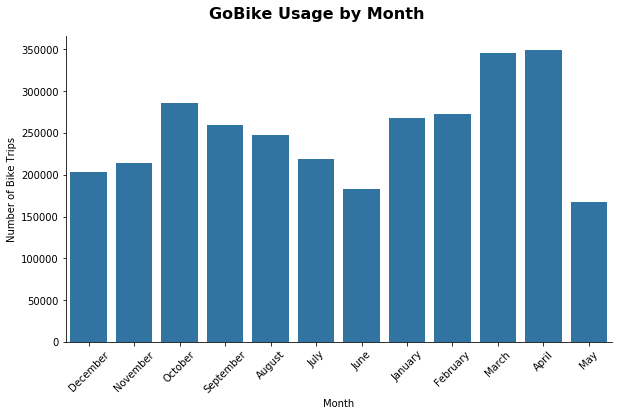

In [4]:
g = sb.catplot(data = df_cleaned, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

g.set_axis_labels('Month', 'Number of Bike Trips'),

g.fig.suptitle('GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

g.set_xticklabels(rotation=45);

### Bike rentals are higher March, April, August, September and October. 

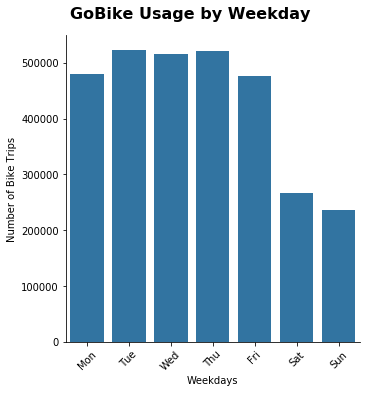

In [5]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sb.catplot(data=df_cleaned, x='start_time_weekday', kind='count', color = no_color, order = weekday)

g.set_axis_labels('Weekdays', 'Number of Bike Trips')

g.fig.suptitle('GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

g.set_xticklabels(rotation=45);

### Bike rentals are higher Monday thru Friday

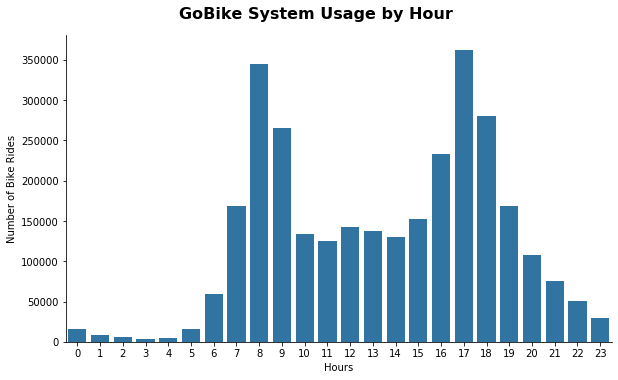

In [6]:
g = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

g.set_axis_labels('Hours', 'Number of Bike Rides')

g.fig.suptitle('GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

### Bike rentals are higher in the morning (7 AM - 9 AM) and in the afternoon (4 PM - 6 PM). These are traditionaly "rush hour" times.

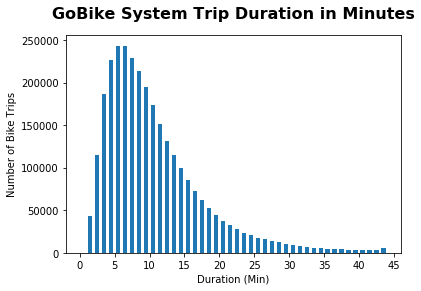

In [7]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration_minutes', bins = bin_edges, rwidth = 0.6);

plt.title("GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

### The majority of bike rental duration seems to be between 4 - 15 minutes in this dataset.

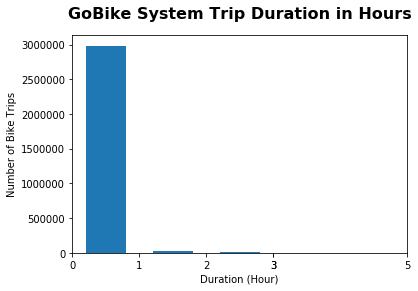

In [21]:
bin_edges = np.arange(0, 5, 1)
ticks = [0, 1, 2, 3, 3, 5]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration_hours', bins = bin_edges, rwidth = 0.6);

plt.title("GoBike System Trip Duration in Hours", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Hour)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

In [22]:
hour_or_less = df_cleaned.query('duration_hours <= 1')['bike_id'].count()
great_1_hour = df_cleaned.query('duration_hours > 1')['bike_id'].count()

prcnt_hour_or_less = round((hour_or_less / df_cleaned.shape[0]) * 100, 2)
prcnt_great_1_hour = round((great_1_hour / df_cleaned.shape[0]) * 100, 2)

print('Rides less than or equal to 1 hour: ' + str(hour_or_less) + ' or ' + str(prcnt_hour_or_less) + '%', 
     '\nRides greater than 1 hour: ' + str(great_1_hour) + ' or ' + str(prcnt_great_1_hour) + '%',
     )

Rides less than or equal to 1 hour: 3003854 or 99.54% 
Rides greater than 1 hour: 13821 or 0.46%


### Less that 1% of rides exceed 1 hour

> Rides less than or equal to 1 hour: 3003854 or 99.54% 
>
> Rides greater than 1 hour: 13821 or 0.46%

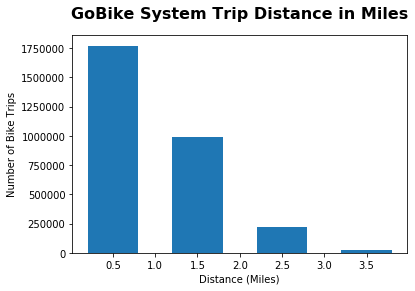

In [23]:
bin_edges = np.arange(0, 5, 1)
ticks = [0, 1, 2, 3, 3, 5, 6, 7, 8, 9, 10]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'distance_miles', bins = bin_edges, rwidth = 0.6);

plt.title("GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

### The majority of bike rentals are between 1 and 2 miles.

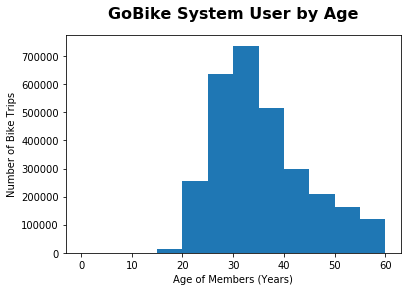

In [24]:
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_cleaned, x = 'member_age', bins = bin_edges);

plt.title("GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

### Most bikes are rented by people between 25 and 40 years old. 

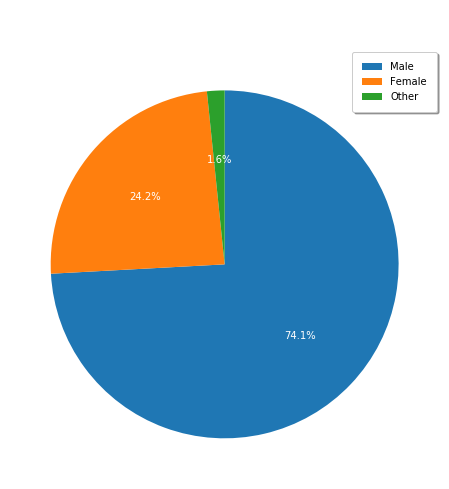

In [26]:
gender = df_cleaned.member_gender.value_counts()

plt.figure(figsize = [10, 8])

plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});

plt.title('GoBike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'white');
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

### Males consist of nearly 75% of the bike rental population

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the data suggests that bike rentals are more popular during the week during "rush hours" than I would have expected. The months with higher rental numbers also suggests that people are more likely to rent a bike during months with more moderate temperatures than colder months (December, January, February) or warmer months (May, June, July).I was also surprised to see the short durations in both time and distance. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found that there were so few rides that lasted longer than 1 hour that there was no sense in trying to plot that data, less than 1% of rides in the dataset lasted longer than 1 hour.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [27]:
df_cleaned = pd.read_csv('fordgobike_clean.csv')
no_color = sb.color_palette()[0]
base_color = sb.color_palette()[0]

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017675 entries, 0 to 3017674
Data columns (total 29 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         int64  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int64  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        int64  
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  member_age               int64  
 17  start_time_month         object 
 18  start_time_day           int64  
 19  start_time_weekday       object 
 20  start_time_hour          int64  
 21  end_time

In [29]:
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_cleaned['bike_id'].count()
subscriber_proportion = subscriber / df_cleaned['bike_id'].count()

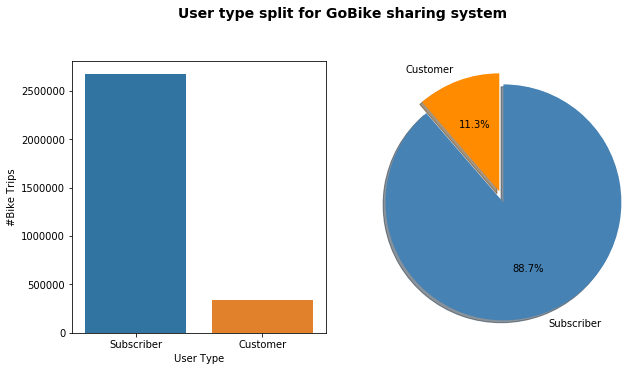

In [30]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_cleaned, x="user_type", order=df_cleaned.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

### Subscribers make up 88.7% of the total bike rentals where as customers only equal 11.3%

In [31]:
df_cleaned.member_gender.value_counts()

Male      2237394
Female     731098
Other       49183
Name: member_gender, dtype: int64

In [32]:
# calculating % split for the user type
male = df_cleaned.query('member_gender == "Male"')['bike_id'].count()
female = df_cleaned.query('member_gender == "Female"')['bike_id'].count()
other = df_cleaned.query('member_gender == "Other"')['bike_id'].count()

male_proportion = male / df_cleaned['bike_id'].count()
female_proportion = female / df_cleaned['bike_id'].count()
other_proportion = other / df_cleaned['bike_id'].count()

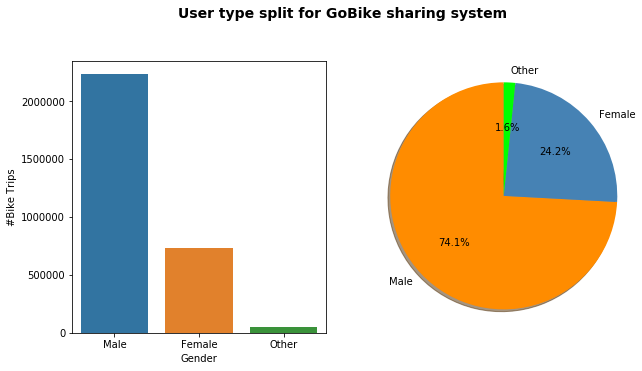

In [33]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_cleaned, x="member_gender", order=df_cleaned.member_gender.value_counts().index)
g.set_xlabel('Gender')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Male', 'Female', 'Other']
sizes = [male_proportion, female_proportion, other_proportion]
colors = ['darkorange', 'steelblue', 'lime']
explode = (0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');


### Rentals % by gender: 
> - Males: 74.1%
- Females: 24.2%
- Other: 1.6%

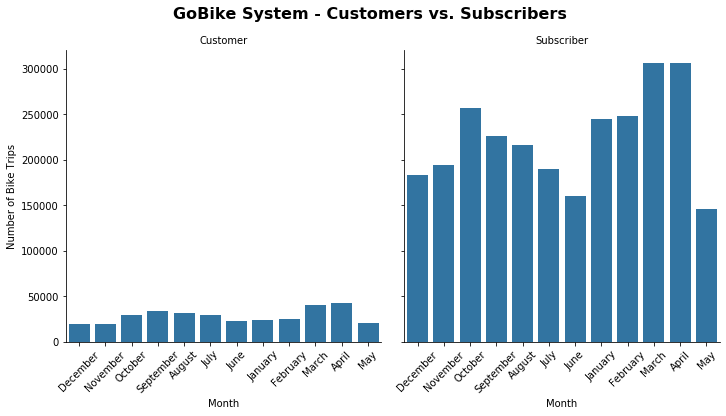

In [34]:
g = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color);

g.set_axis_labels("Month", "Number of Bike Trips");
g.set_titles("{col_name}");

g.fig.suptitle('GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=45);

### Rental trends are proportional between subscribers and customers.

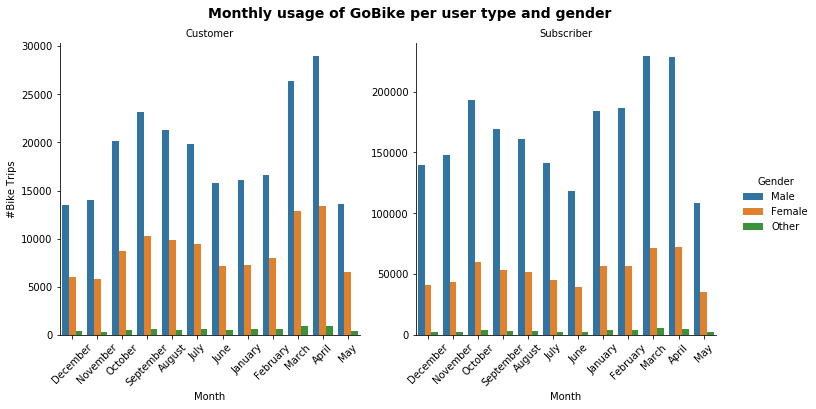

In [35]:
g = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of GoBike per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=45);

### The proportions of user types and gender type is consistent.

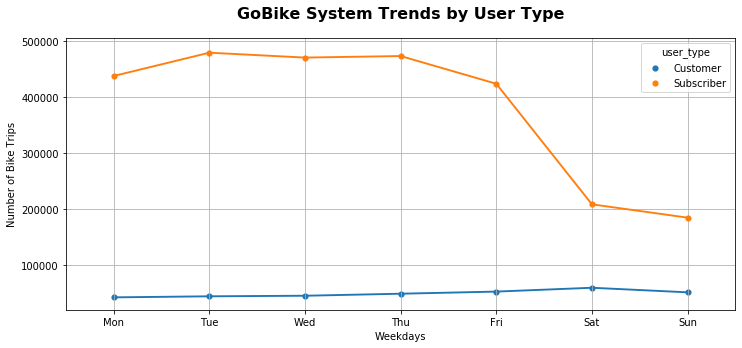

In [36]:
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

### Subscribers rent more during the week than customers. Customer rentals are increase from Friday thru Sunday.

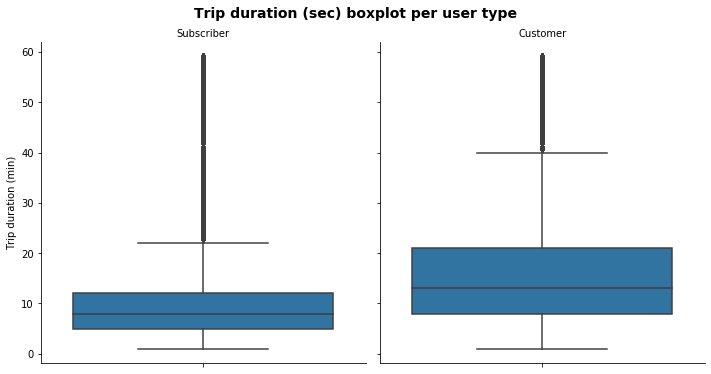

In [37]:
data = df_cleaned.query('duration_minutes < 60')
g = sb.catplot(data=data, y='duration_minutes', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (min)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

### Customers trip duration is longer than subscribers

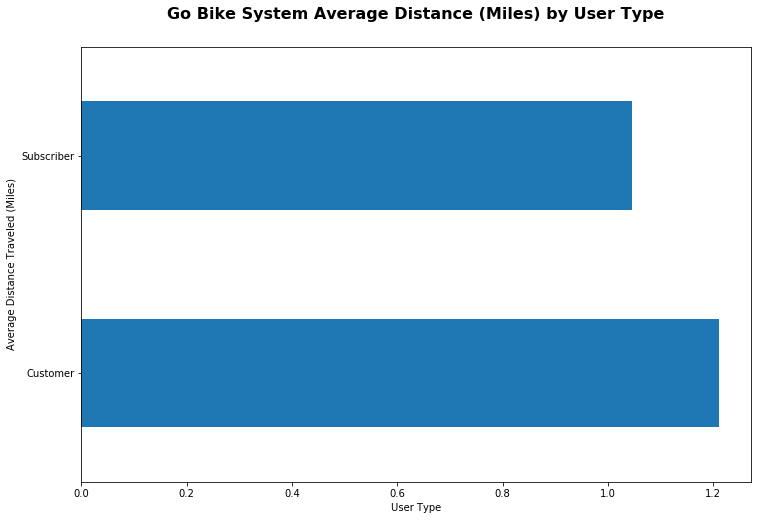

In [38]:
plt = df_cleaned.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

### Customers tend to travel farther than subscribers

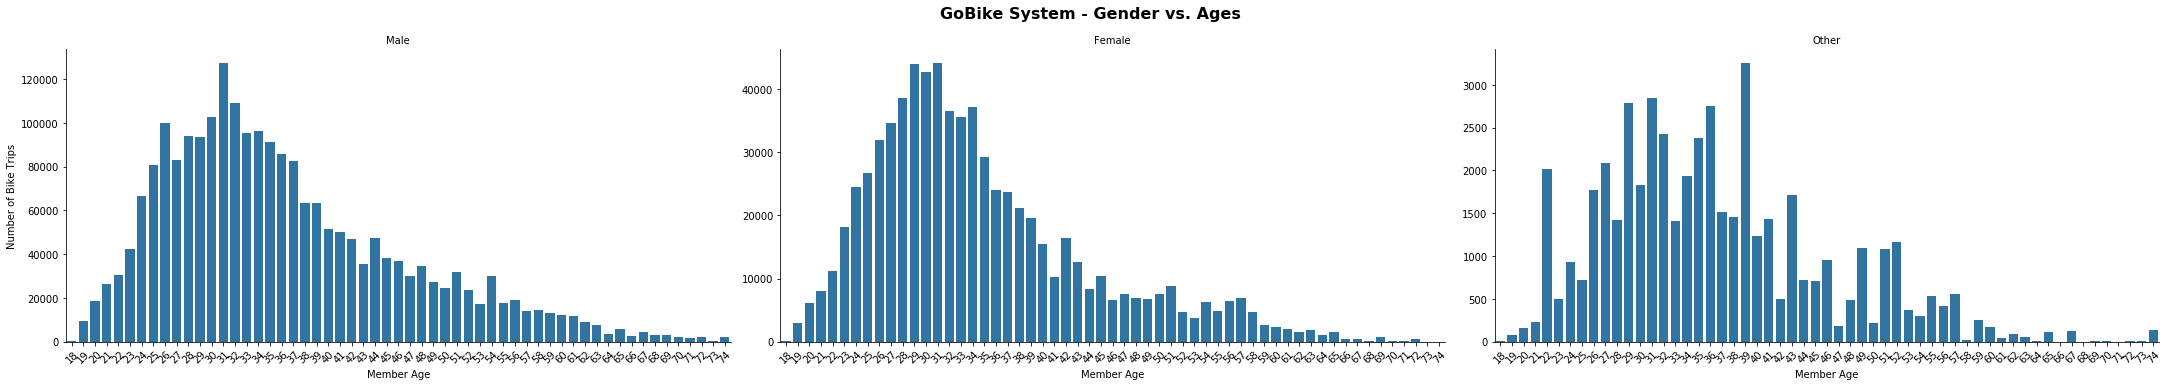

In [39]:
g = sb.catplot(data = df_cleaned, x = 'member_age', col='member_gender', kind='count', sharey = False, color = no_color, height=5, aspect=2)

g.set_axis_labels('Member Age', 'Number of Bike Trips')
g.set_titles('{col_name}')

g.fig.suptitle('GoBike System - Gender vs. Ages', y=1.05, fontsize=16, fontweight='bold');
g.set_xticklabels(rotation=45);

### There distribution of males and females vs age appears proportional with one another.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers ride at all different hours of the day throughout the week while subscribers show to ride more during the week during "rush hour" hours, morning and afternoon. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers tend to travel farther than subscribers and their trip durations are longer.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [41]:
df_cleaned.user_type.value_counts()

Subscriber    2675554
Customer       342121
Name: user_type, dtype: int64

In [42]:
df_cleaned.member_gender.value_counts()

Male      2237394
Female     731098
Other       49183
Name: member_gender, dtype: int64

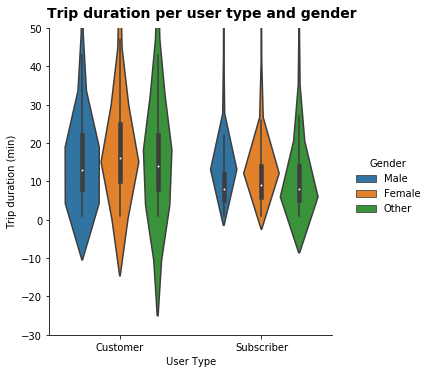

In [44]:
g = sb.catplot(data=df_cleaned, x='user_type', y="duration_minutes", hue="member_gender", kind="violin")
g.set(ylim=(-30, 50))
g.set_axis_labels("User Type", "Trip duration (min)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

### This took some time, at first my plot was kind of flat, I had to change teh Y limits in order to see a better representation of the data.

In [45]:
subscriber_male_mean = round(df_cleaned.query('member_gender == "Male" & user_type == "Subscriber"')['duration_minutes'].mean(), 2)
customer_male_mean = round(df_cleaned.query('member_gender == "Male" & user_type == "Customer"')['duration_minutes'].mean(), 2)
subscriber_female_mean = round(df_cleaned.query('member_gender == "Female" & user_type == "Subscriber"')['duration_minutes'].mean(), 2)
customer_female_mean = round(df_cleaned.query('member_gender == "Female" & user_type == "Customer"')['duration_minutes'].mean(), 2)
subscriber_other_mean = round(df_cleaned.query('member_gender == "Other" & user_type == "Subscriber"')['duration_minutes'].mean(), 2)
customer_other_mean = round(df_cleaned.query('member_gender == "Other" & user_type == "Customer"')['duration_minutes'].mean(), 2)

male_mean = round(df_cleaned.query('member_gender == "Male"')['duration_minutes'].mean(), 2)
female_mean = round(df_cleaned.query('member_gender == "Female"')['duration_minutes'].mean(), 2)
other_mean = round(df_cleaned.query('member_gender == "Other"')['duration_minutes'].mean(), 2)

In [46]:
print('Male avg dur: ' + str(male_mean) + ', Subscriber avg dur: ' + str(subscriber_male_mean) + ', Customer avg dur: ' + str(customer_male_mean), 
      '\nFemale avg dur: ' + str(female_mean) + ', Subscriber avg dur: ' + str(subscriber_female_mean) + ', Customer avg dur: ' + str(customer_female_mean), 
      '\nOther avg dur: ' + str(other_mean) + ', Subscriber avg dur: ' + str(subscriber_other_mean) + ', Customer avg dur: ' + str(customer_other_mean)
)

Male avg dur: 11.7, Subscriber avg dur: 10.24, Customer avg dur: 24.43 
Female avg dur: 14.47, Subscriber avg dur: 11.9, Customer avg dur: 29.7 
Other avg dur: 14.97, Subscriber avg dur: 13.2, Customer avg dur: 25.21


In [47]:
print('Male avg duration:' + 
      '\nSubscriber vs Customer: ' + 
      '\nSubscribers % rental time vs average: ' + str(round(((subscriber_male_mean - male_mean)/male_mean) * 100, 2)) + 
      '\nCustomers % rental time vs average ' + str(round(((customer_male_mean - male_mean)/male_mean) * 100, 2)) + 
      '\n\nFemale avg duration:' + 
      '\nSubscriber vs Customer: ' + 
      '\nSubscribers % rental time vs average: ' + str(round(((subscriber_female_mean - male_mean)/female_mean) * 100, 2)) + 
      '\nCustomers % rental time vs average ' + str(round(((customer_female_mean - male_mean)/female_mean) * 100, 2)) + 
      '\n\nOther avg duration:' + 
      '\nSubscriber vs Customer: ' + 
      '\nSubscribers % rental time vs average: ' + str(round(((subscriber_other_mean - male_mean)/other_mean) * 100, 2)) + 
      '\nCustomers % rental time vs average ' + str(round(((customer_other_mean - male_mean)/other_mean) * 100, 2)) 
     )

Male avg duration:
Subscriber vs Customer: 
Subscribers % rental time vs average: -12.48
Customers % rental time vs average 108.8

Female avg duration:
Subscriber vs Customer: 
Subscribers % rental time vs average: 1.38
Customers % rental time vs average 124.4

Other avg duration:
Subscriber vs Customer: 
Subscribers % rental time vs average: 10.02
Customers % rental time vs average 90.25


### Males rent bikes for a wider range of time, from around 4 minutes to 18 minutes with an average of 11.7  minutes, however females tend to rent bikes for longer, they average 14.5 minute bike rentals.

### Females may not rent as many bikes but they do tend to rent them for a longer amount of time.
>
- Male avg duration:
- Subscriber vs Customer: 
- Subscribers % rental time vs average: -12.48
- Customers % rental time vs average 108.8

- Female avg duration:
- Subscriber vs Customer: 
- Subscribers % rental time vs average: 1.38
- Customers % rental time vs average 124.4

- Other avg duration:
- Subscriber vs Customer: 
- Subscribers % rental time vs average: 10.02
- Customers % rental time vs average 90.25


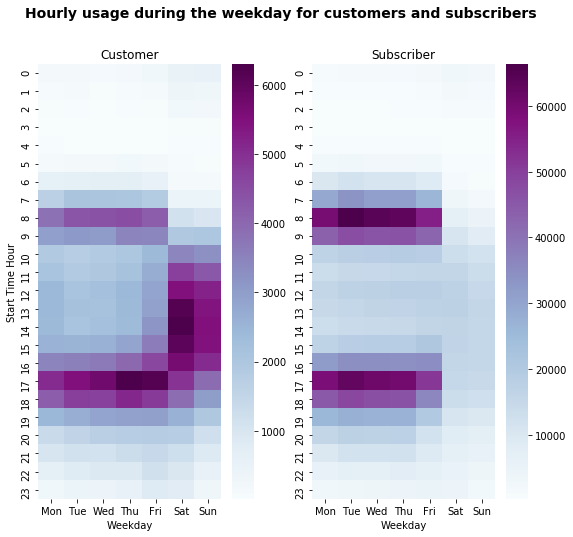

In [63]:
import matplotlib.pyplot as plt

# Setting the weekday order
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

### Customers and Subscribers tend to use rent bikes during the same time of the day during the week. However, Customers are more likely to rent bikes on the weekends during the day.


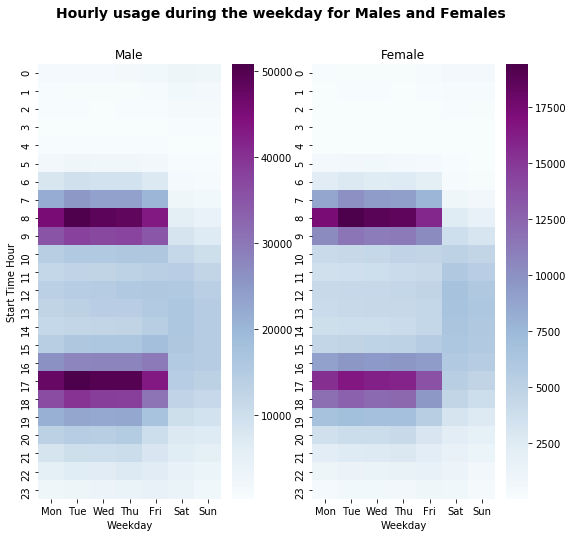

In [62]:
import matplotlib.pyplot as plt

# Setting the weekday order
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for Males and Females', fontsize=14, fontweight='semibold')

# heatmap for males
plt.subplot(1, 2, 1)
df_male = df_cleaned.query('member_gender == "Male"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_male, cmap="BuPu")

plt.title("Male", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for females
plt.subplot(1, 2, 2)
df_female = df_cleaned.query('member_gender == "Female"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_female, cmap="BuPu")

plt.title("Female", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

### Both males and females tend to rent bikes during the same hours especially during the week, Monday - Friday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between customers, subscribers, trip duration and trip distance has been further shown. Subscibers of all genders and ages tend to use the bike share during the week between the hours of 6-9 AM and 4-6 PM. Customers, on the other hand, tend to ride at all hours of the day with a jump in rentals on the weekend starting on Friday and going through Sunday.

### Were there any interesting or surprising interactions between features?

> Everything went as expected. The heat maps do a really good job of reinforcing the data that began to show itself as the analysis progressed.

### Sources
- https://stackoverflow.com/questions/52521594/adding-a-path-to-pandas-to-csv-function
- https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
- https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
- https://gist.github.com/okdolly/11160dcf5397cc8e2e87fb07133126cd
- https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
- https://www.movable-type.co.uk/scripts/latlong.html
- https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
- 